In [8]:
import os, sys
import cv2
import numpy as np
import pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Dense, Flatten
import matplotlib.pyplot as plt

def get_data_from_file(train_file):
  train_data = []
  # enter your code here (7 points)
  with open(train_file) as fp:
    lines = fp.readlines()
    for k, line in enumerate(lines):
      print('{:6d} /{:6d}'.format(k+1, len(lines)), end='\r')
      #obtain img_path from line (make sure that your img_path is correct)
      img_path = os.path.join('train', line.strip())
      try:
        img = cv2.imread(img_path)
        img_resized = cv2.resize(img, (48, 48))
        if 'cat' in line:
          label = 0
        else:
          label = 1

        train_data.append([img_resized, label])
      except:
        print(f"Error. Can not find: {img_path}")
  return train_data

def get_image_and_label(train_data):
  # enter your code here (8 points)
  X_train = np.array([data[0] for data in train_data])
  # print(X_train)
  Y_train = np.array([data[1] for data in train_data])
  # print(Y_train)
  return X_train, Y_train

def assignment4b_1():
  train_file = 'train_list.txt'
  test_file = 'test_list.txt'
  train_data = get_data_from_file(train_file)
  X_train, Y_train = get_image_and_label(train_data)
  # print()  
  test_data = get_data_from_file(test_file)
  X_test, Y_test = get_image_and_label(test_data)
  # print()
  print(len(train_data))
  # print(train_data[0][0].shape)
  print(len(test_data))
  # print(test_data[0][0].shape)

  save_path = 'dogs_cats.pkl'
  print('Saving to', save_path)
  data = {}
  data['X_train'] = X_train
  data['Y_train'] = Y_train
  data['X_test'] = X_test
  data['Y_test'] = Y_test
  pickle.dump(data, open(save_path, 'wb'))

def build_model():
  # enter your code here, and remove the following pass (15 points)
  model = keras.Sequential([
    # 48,48,3>>48,48,32  維度不變  kernal size(3, 3)
    keras.layers.Conv2D(32, (3, 3), activation='softmax', input_shape=(48, 48, 3)),
    # 48,48,32>>24,24,32  維度減半  pool size(2, 2)
    keras.layers.MaxPooling2D((2, 2)),
    # 24,24,32>>24,24,32  維度不變  kernal size(3, 3)
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    # 24,24,32>>12,12,32  維度減半  pool size(2, 2)
    keras.layers.MaxPooling2D((2, 2)),
    # 12,12,32>>12,12,32  維度不變  kernal size(3, 3)
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    # 12,12,32>>6,6,32  維度減半  pool size(2, 2)
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(2, activation='softmax')
  ])
  return model

  # pass

def assignment4b_2():
  data = pickle.load(open("dogs_cats.pkl","rb"))
  X_train, Y_train, X_test, Y_test = data["X_train"], data["Y_train"], data["X_test"], data["Y_test"]
  X_train = X_train / 255.0
  X_test = X_test / 255.0
  model = build_model()
  model.summary()
  model.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  ck_dir = "ckpt_dogcat"
  checkpoint_path = ck_dir+"/cp-{epoch:04d}.ckpt"
  cp_callback = keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1, period=10)
  batch_size = 64
  epochs = 60
  # enter your code here (5 points)

  history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,
                      callbacks=[cp_callback], validation_split=0.1, shuffle=True)
  
  _, test_acc = model.evaluate(X_test, Y_test)
  print(f"Test accuracy: {test_acc:.4f}")
  
  with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)



    
def assignment4b_3():
  # enter your code here, and remove the following pass (5 points)
  history = pickle.load(open('history.pkl', 'rb'))

  plt.figure(figsize=(12, 4))
  plt.subplot(1, 2, 1)
  plt.plot(history['accuracy'], label='Train')
  plt.plot(history['val_accuracy'], label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(history['loss'], label='Train')
  plt.plot(history['val_loss'], label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

  plt.tight_layout()
  plt.show()
  pass

def assignment4b_4():
  # enter your code here, and remove the following pass (5 points)
  data = pickle.load(open("dogs_cats.pkl", "rb"))
  X_train, Y_train, X_test, Y_test = data["X_train"], data["Y_train"], data["X_test"], data["Y_test"]

  # Normalize pixel values to [0, 1]
  X_train = X_train / 255.0
  X_test = X_test / 255.0

  # Build the model
  model = build_model()

    # Compile the model
  model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Define the checkpoint directory and format
  ck_dir = "ckpt_dogcat"
  checkpoint_path = ck_dir + "/cp-{epoch:04d}.ckpt"

    # Evaluate the model at different epochs
  epochs = [10, 20, 30, 40, 50, 60]
  for epoch in epochs:
      # Load the model weights from the checkpoint
      model.load_weights(checkpoint_path.format(epoch=epoch))

      # Evaluate the model on the test data
      test_loss, test_acc = model.evaluate(X_test, Y_test)
      print(f"Epoch {epoch:02d} - Test Accuracy: {test_acc:.4f}")
  pass


In [9]:
if __name__ == '__main__':
    assignment4b_1() # do not modify this line

200000 /  5000
5000
Saving to dogs_cats.pkl


In [10]:
    assignment4b_2() # do not modify this line

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 46, 46, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 21, 21, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)              

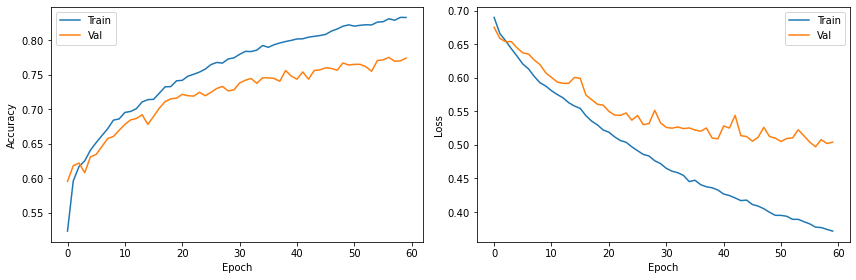

In [11]:
    assignment4b_3() # do not modify this line

In [12]:
    assignment4b_4() # do not modify this line

157/157 [==============================] - 2s 14ms/step - loss: 0.5893 - accuracy: 0.6884
Epoch 10 - Test Accuracy: 0.6884
157/157 [==============================] - 3s 17ms/step - loss: 0.5372 - accuracy: 0.7320
Epoch 20 - Test Accuracy: 0.7320
157/157 [==============================] - 3s 17ms/step - loss: 0.5026 - accuracy: 0.7502
Epoch 30 - Test Accuracy: 0.7502
157/157 [==============================] - 3s 16ms/step - loss: 0.4801 - accuracy: 0.7714
Epoch 40 - Test Accuracy: 0.7714
157/157 [==============================] - 2s 15ms/step - loss: 0.4679 - accuracy: 0.7842
Epoch 50 - Test Accuracy: 0.7842
157/157 [==============================] - 3s 16ms/step - loss: 0.4619 - accuracy: 0.7890
Epoch 60 - Test Accuracy: 0.7890


In [13]:
# Question 1 (5 points): If we set shuffle=False during the execution of model.fit() in Assignment 4b-2,
# which was previously set to shuffle=True, what impact will this have on the validation accuracy?
# Write down your answer here.
#不shuffle的話，訓練資料和測試資料是固定的，會導致模型過擬合，沒有代表性

In [14]:
# Question 2 (5 points): In Assignment 4b-4, what epoch yields the highest test accuracy, and what is the reason for this?
# Write down your answer here.
# epoch 60有最高的 test accurancy
# reason 訓練充足，合適的learning rate，有效的正規化